# Reading the Web Page into Python

# Wrangling Data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from itertools import permutations
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Plot Customizations
sns.set() # matplotlib defaults

plt.rcParams['figure.figsize'] = (12,3)
%config InlineBackend.figure_format='retina'

In [3]:

#def get_url(url):
url=['https://www.lotterycorner.com/ga/cash-3-midday/2016',
     'https://www.lotterycorner.com/ga/cash-3-midday/2017',
     'https://www.lotterycorner.com/ga/cash-3-midday/2018']
yr= 0
#url=['https://www.lotterycorner.com/ga/cash-3-midday/2018']
dfc3 = pd.DataFrame([])
for i in url:
    r = requests.get(url[yr])
    soup= BeautifulSoup(r.text, 'html.parser')
    table = soup.find_all('table')[0] 
    df= pd.read_html(str(table))[0]
    #Make first row the column headers
    df.columns = df.iloc[0]
    df = df[1:]
    # Remove all rows with nulls
    #df.dropna(inplace=True)----
    # Remove the "Jackpot" columns
    df.drop(['Jackpot'], axis=1, inplace= True)
    #Separate and expand data from the 'Winning Numbers' column into other columns beginning with 'Digit'
    df = df.join(df['Winning Numbers'].str.split(' ', expand=True).add_prefix('Digit'))
        #remove white spaces
    df['Winning Numbers'] = df['Winning Numbers'].str.replace(" ","")
        #Add two new columns to dataframe
    df['First2']=df['Winning Numbers'].str[0:2]
    df['FirstLast']=df['Winning Numbers'].str[0] + df['Winning Numbers'].str[2]
    df['Last2']=df['Winning Numbers'].str[1:3]
    
        #Make the Date column a date type
    df['Date'] = pd.to_datetime(df['Date'])
        #Set the Date column as the indate
    df.set_index('Date', inplace=True)
    #df.index.name = None
        #Rename Column
    df.rename(columns={'Winning Numbers': 'WinNum'}, inplace=True)
        #Change data type from object to integer
    cols = ['Digit0', 'Digit1', 'Digit2']
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)    
    yr=yr+1
    dfc3=dfc3.append(df)
    #df = df.sort_index(inplace=True)
    

In [4]:
df=dfc3

In [5]:
df.sort_index(inplace=True)

In [6]:
df['day_of_week'] = df.index.weekday
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

In [7]:
#col=df.columns
#col
df = df[['WinNum','day_of_week', 'Digit0', 'Digit1', 'Digit2', 'First2', 'FirstLast', 'Last2']]

In [8]:
df.tail()

,WinNum,day_of_week,Digit0,Digit1,Digit2,First2,FirstLast,Last2
Date,,,,,,,,
2018-11-11,790,Sun,7,9,0,79,70,90
2018-11-12,188,Mon,1,8,8,18,18,88
2018-11-13,531,Tues,5,3,1,53,51,31
2018-11-14,648,Weds,6,4,8,64,68,48
2018-11-15,531,Thurs,5,3,1,53,51,31


vcGrpByD0=df['2018'].groupby(['day_of_week','Digit0'])['DayNxDay0'].value_counts()

In [9]:
#Add Shiftup column with blanks
df["ShiftUp0"] = [[] for _ in range(len(df))]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
#Add Combination column
df["Combo"] = [[] for _ in range(len(df))]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#Add Data to Shiftup column
df['ShiftUp0'] = df['Digit0'].shift(-1)
#dfc3['ShiftUp0']=dfc3['ShiftUp0'].astype(int)

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#Add Data to Shiftup column
df['ShiftUp1'] = df['Digit1'].shift(-1)

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#Add Data to Shiftup column
df['ShiftUp2'] = df['Digit2'].shift(-1)

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#Add Data to Shiftup Diff column
df['ShiftUp0Diff']=df['ShiftUp0']- df.Digit0

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#Add Data to Shiftup Diff column
df['ShiftUp1Diff']=df['ShiftUp1']- df.Digit1

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Add Data to Shiftup Diff column
df['ShiftUp2Diff']=df['ShiftUp2']- df.Digit2

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#replace nan with zero
df.fillna(0, inplace=True)

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
#Combine ShiftUp and ShiftUpDiff columns
df['DayNxDay0']=df.Digit0.astype(str) + df.ShiftUp0.astype(str)
df['DayNxDay0']=df['DayNxDay0'].str[:2]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#Combine ShiftUp and ShiftUpDiff columns
df['DayNxDay1']=df.Digit1.astype(str) + df.ShiftUp1.astype(str)
df['DayNxDay1']=df['DayNxDay1'].str[:2]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#Combine ShiftUp and ShiftUpDiff columns
df['DayNxDay2']=df.Digit2.astype(str) + df.ShiftUp2.astype(str)
df['DayNxDay2']=df['DayNxDay2'].str[:2]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
#Add Shiftup column
df['EvenOdd0'] = [[] for _ in range(len(df))]
df["EvenOdd1"] = [[] for _ in range(len(df))]
df["EvenOdd2"] = [[] for _ in range(len(df))]

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/LinuxUser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [41]:
#Reordering Digit0 - 2 lowest to highest and placing in tuple into the Comb Column
singleNum=[]
doubleNum=[]
for index, row in df.iterrows():
    a=(row['Digit0'] ,row['Digit1'],row['Digit2'])
    Maxa = max(a)
    Mina = min(a)
    maxmin=(Mina,Maxa)
    ChkDigitCount=list(set([x for x in a if a.count(x) > 1]))    
 #Check if digit exist more than once
    if (row['Digit0']==row['Digit1']) & (row['Digit0']==row['Digit2']):
        df.loc[index,'Combo']= str(row['Digit0'])+ str(row['Digit1'])+str(row['Digit2'])
        df.loc[index,'PermComb']='AllDigitSame'
    elif ChkDigitCount==[]:
        MiddleNum =set(maxmin).symmetric_difference(a)
        result=str(MiddleNum).replace('{',"").replace('}',"")
        MiddleNum=result *1  #change string to integer
        #df18.set_value(index,'Comb', (Mina,MiddleNum,Maxa))
        df.loc[index,'Combo']=str(Mina)+str(MiddleNum)+str(Maxa)
        df.loc[index,'PermComb']='NoDigitSame' 
        singleNum.append(str(Mina)+str(MiddleNum)+str(Maxa))
    elif ChkDigitCount[0] >= 0:
        #row['Comb']=(Mina,ChkDigitCount[0],Maxa)
        df.loc[index,'Combo']=str(Mina)+str(ChkDigitCount[0])+str(Maxa)
        #df.loc[index,'Combo']=(Mina,ChkDigitCount[0],Maxa) 
        df.loc[index,'PermComb']='TwoDigitSame'
        doubleNum.append(str(Mina)+str(ChkDigitCount[0])+str(Maxa))

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
#Compare if number is even/odd & and higher,lower or the same as than the next day number **FOR DIGIT 0**
#Digit=[row['Digit0'], row['Digit1'], row['Digit2']]
#ShiftUp=[row['ShiftUp0'], row['ShiftUp1'], row['ShiftUp2']]
#EOdd=['EvenOdd0', 'EvenOdd1', 'EvenOdd2']
#i=[0,1,2.3]
#for i in Digit:  
#n=0
#while i[n]!=3:
#i=0
    
for index, row in df.iterrows():
        if  row['Digit0'] % 2 == 0:
            ChkEven=True
            ChkOdd=''
        else:
            ChkOdd=True
            ChkEven=''

        if row['ShiftUp0'] % 2 == 0:
            ChkEvenShiftUp=True
            ChkOddShiftUp=''
        else:
            ChkOddShiftUp=True
            ChkEvenShiftUp=''


        if ((ChkEven == True) & (row['Digit0']>row['ShiftUp0']) & (ChkEvenShiftUp==True)):
            df.at[index,'EvenOdd0']="Even_down"
            #df.at[index,'EvenOdd1']="Even_down" 
        elif ((ChkEven == True) & (row['Digit0']<row['ShiftUp0'])& (ChkEvenShiftUp==True)):
            df.at[index,'EvenOdd0']="Even_up" 
        elif ((ChkOdd== True) & (row['Digit0']>row['ShiftUp0']) & (ChkOddShiftUp==True)):
            df.at[index,'EvenOdd0']="Odd_down" 
        elif ((ChkOdd == True) & (row['Digit0']<row['ShiftUp0'])& (ChkOddShiftUp==True)):
            df.at[index,'EvenOdd0']="Odd_up" 
        elif ((ChkEven == True) & (row['Digit0']>row['ShiftUp0']) & (ChkOddShiftUp==True)):
            df.at[index,'EvenOdd0']="Even_to_Odd_down" 
        elif ((ChkEven == True) & (row['Digit0']<row['ShiftUp0'])& (ChkOddShiftUp==True)):
            df.at[index,'EvenOdd0']="Even_to_Odd_up" 
        elif ((ChkOdd== True) & (row['Digit0']>row['ShiftUp0']) & (ChkEvenShiftUp==True)):
            df.at[index,'EvenOdd0']="Odd_to_Even_down" 
        elif ((ChkOdd == True) & (row['Digit0']<row['ShiftUp0'])& (ChkEvenShiftUp==True)):
            df.at[index,'EvenOdd0']="Odd_to_Even_up" 
        else:
            df.at[index,'EvenOdd0']="Same" 
 

In [24]:
#Compare if number is even/odd & and higher,lower or the same as than the next day number **FOR DIGIT 1**
for index, row in df.iterrows():
    if row['Digit1'] % 2 == 0:
        ChkEven=True
        ChkOdd=''
    else:
        ChkOdd=True
        ChkEven=''
        
    if row['ShiftUp1'] % 2 == 0:
        ChkEvenShiftUp=True
        ChkOddShiftUp=''
    else:
        ChkOddShiftUp=True
        ChkEvenShiftUp=''
        
        
    if ((ChkEven == True) & (row['Digit1']>row['ShiftUp1']) & (ChkEvenShiftUp==True)):
        df.at[index,'EvenOdd1']="Even_down" 
    elif ((ChkEven == True) & (row['Digit1']<row['ShiftUp1'])& (ChkEvenShiftUp==True)):
        df.at[index,'EvenOdd1']="Even_up" 
    elif ((ChkOdd== True) & (row['Digit1']>row['ShiftUp1']) & (ChkOddShiftUp==True)):
        df.at[index,'EvenOdd1']="Odd_down" 
    elif ((ChkOdd == True) & (row['Digit1']<row['ShiftUp1'])& (ChkOddShiftUp==True)):
        df.at[index,'EvenOdd1']="Odd_up" 
    elif ((ChkEven == True) & (row['Digit1']>row['ShiftUp1']) & (ChkOddShiftUp==True)):
        df.at[index,'EvenOdd1']="Even_to_Odd_down" 
    elif ((ChkEven == True) & (row['Digit1']<row['ShiftUp1'])& (ChkOddShiftUp==True)):
        df.at[index,'EvenOdd1']="Even_to_Odd_up" 
    elif ((ChkOdd== True) & (row['Digit1']>row['ShiftUp1']) & (ChkEvenShiftUp==True)):
        df.at[index,'EvenOdd1']="Odd_to_Even_down" 
    elif ((ChkOdd == True) & (row['Digit1']<row['ShiftUp1'])& (ChkEvenShiftUp==True)):
        df.at[index,'EvenOdd1']="Odd_to_Even_up" 
    else:
        df.at[index,'EvenOdd1']="Same" 

In [115]:
#Compare if number is even/odd & and higher,lower or the same as than the next day number **FOR DIGIT 2**
for index, row in df.iterrows():
    if row['Digit2'] % 2 == 0:
        ChkEven=True
        ChkOdd=''
    else:
        ChkOdd=True
        ChkEven=''
        
    if row['ShiftUp2'] % 2 == 0:
        ChkEvenShiftUp=True
        ChkOddShiftUp=''
    else:
        ChkOddShiftUp=True
        ChkEvenShiftUp=''
        
        
    if ((ChkEven == True) & (row['Digit2']>row['ShiftUp2']) & (ChkEvenShiftUp==True)):
        df.loc[index,'EvenOdd2']="Even_down" 
    elif ((ChkEven == True) & (row['Digit2']<row['ShiftUp2'])& (ChkEvenShiftUp==True)):
        df.loc[index,'EvenOdd2']="Even_up" 
    elif ((ChkOdd== True) & (row['Digit2']>row['ShiftUp2']) & (ChkOddShiftUp==True)):
        df.loc[index,'EvenOdd2']="Odd_down" 
    elif ((ChkOdd == True) & (row['Digit2']<row['ShiftUp2'])& (ChkOddShiftUp==True)):
        df.loc[index,'EvenOdd2']="Odd_up" 
    elif ((ChkEven == True) & (row['Digit2']>row['ShiftUp2']) & (ChkOddShiftUp==True)):
        df.loc[index,'EvenOdd2']="Even_to_Odd_down" 
    elif ((ChkEven == True) & (row['Digit2']<row['ShiftUp2'])& (ChkOddShiftUp==True)):
        df.loc[index,'EvenOdd2']="Even_to_Odd_up" 
    elif ((ChkOdd== True) & (row['Digit2']>row['ShiftUp2']) & (ChkEvenShiftUp==True)):
        df.loc[index,'EvenOdd2']="Odd_to_Even_down" 
    elif ((ChkOdd == True) & (row['Digit2']<row['ShiftUp2'])& (ChkEvenShiftUp==True)):
        df.loc[index,'EvenOdd2']="Odd_to_Even_up" 
        #dfc.loc[0,'A'] = 11
    else:
        df.loc[index,'EvenOdd2']="Same" 

/home/LinuxUser/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


print(len(doubleNum)," 2 or more numbers are the same")
print("No numbers are the same",len(singleNum))

In [26]:
#filter data by year
#pd.DatetimeIndex(dfc3['date']).year
df18=dfc3['2018']
df17=dfc3['2017']
df16=dfc3['2016']
#df18=df18.sort_index()
print(df18.shape)
print(df17.shape)
print(df16.shape)

(319, 8)
(365, 8)
(366, 8)


In [27]:
df.tail()

,WinNum,day_of_week,Digit0,Digit1,Digit2,First2,FirstLast,Last2,ShiftUp0,Combo,...,ShiftUp0Diff,ShiftUp1Diff,ShiftUp2Diff,DayNxDay0,DayNxDay1,DayNxDay2,EvenOdd0,EvenOdd1,EvenOdd2,PermComb
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-11,790,Sun,7,9,0,79,70,90,1.0,079,...,-6.0,-1.0,8.0,71,98,08,Odd_down,Odd_to_Even_down,Even_up,NoDigitSame
2018-11-12,188,Mon,1,8,8,18,18,88,5.0,188,...,4.0,-5.0,-7.0,15,83,81,Odd_up,Even_to_Odd_down,Even_to_Odd_down,TwoDigitSame
2018-11-13,531,Tues,5,3,1,53,51,31,6.0,135,...,1.0,1.0,7.0,56,34,18,Odd_to_Even_up,Odd_to_Even_up,Odd_to_Even_up,NoDigitSame
2018-11-14,648,Weds,6,4,8,64,68,48,5.0,468,...,-1.0,-1.0,-7.0,65,43,81,Even_to_Odd_down,Even_to_Odd_down,Even_to_Odd_down,NoDigitSame
2018-11-15,531,Thurs,5,3,1,53,51,31,0.0,135,...,0.0,0.0,0.0,50,30,10,Odd_to_Even_down,Odd_to_Even_down,Odd_to_Even_down,NoDigitSame


zero = 0
string_in_string = "Digit{}".format(zero)
print(string_in_string)

# Start Data Analysis for 2016-2018

In [28]:
#Display options And Customizations
#pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199

In [29]:
#Ranges used for analysis
rng0to99=np.arange(0, 100)
rng0to999=np.arange(0, 1000)
rng0to999t=["%.3d" % i for i in range(1000)]
rng0to99t=["%.2d" % i for i in range(100)]

In [30]:
#Get the Day of the Year
import time
import datetime
dayofyr=datetime.date.today().strftime("%j")
print("Day of year for 2018: ", dayofyr)

Day of year for 2018:  320


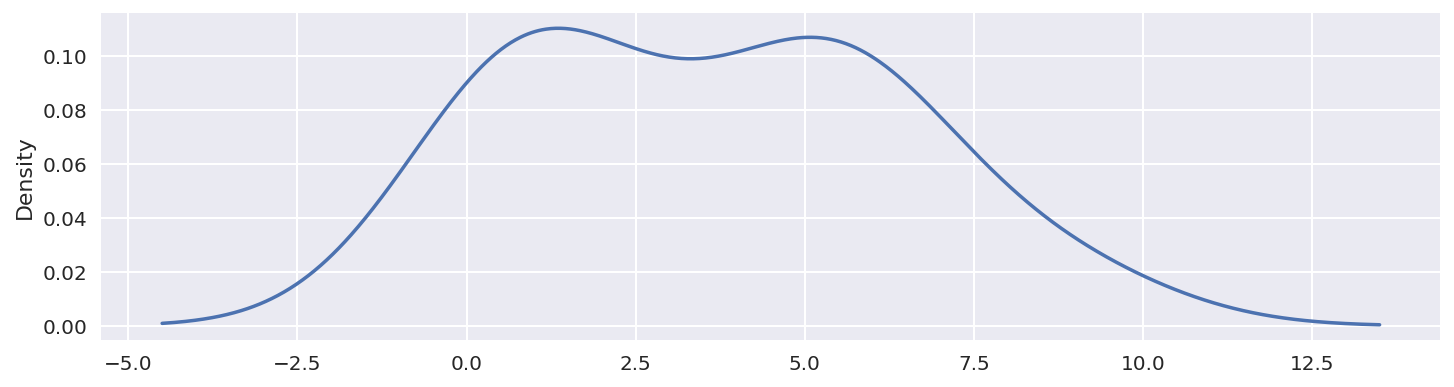

In [31]:
df['2018-11'].Digit0.plot(kind='kde')

In [32]:
df.columns

Index(['WinNum', 'day_of_week', 'Digit0', 'Digit1', 'Digit2', 'First2',
       'FirstLast', 'Last2', 'ShiftUp0', 'Combo', 'ShiftUp1', 'ShiftUp2',
       'ShiftUp0Diff', 'ShiftUp1Diff', 'ShiftUp2Diff', 'DayNxDay0',
       'DayNxDay1', 'DayNxDay2', 'EvenOdd0', 'EvenOdd1', 'EvenOdd2',
       'PermComb'],
      dtype='object')

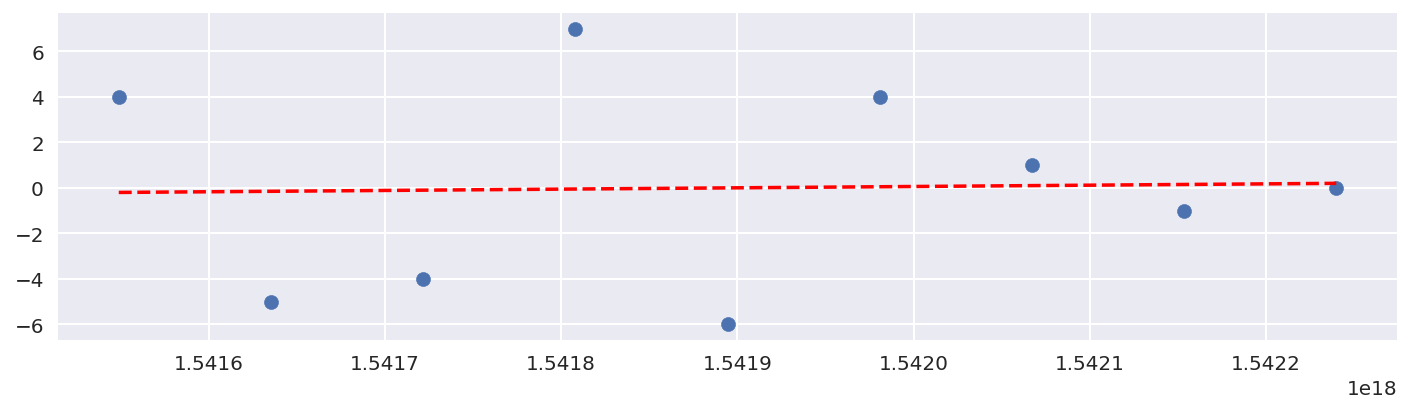

In [61]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['ShiftUp0Diff'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['ShiftUp0Diff'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

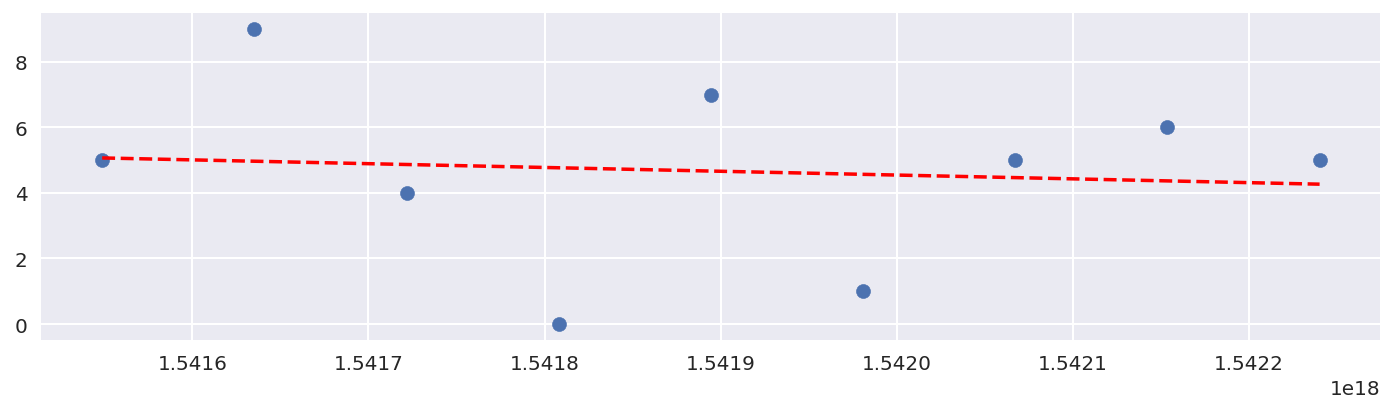

In [62]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['Digit0'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['Digit0'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [90]:
#Start analysis for first digit
#vcGrpByD0=df['2018'].groupby(['Digit0','EvenOdd0'])['DayNxDay0'].value_counts()
vcGrpByD0=df.groupby(['Digit0'])['DayNxDay0'].value_counts()
vcGrpByD0Mn=vcGrpByD0.mean()
vcGrpByD0[vcGrpByD0>vcGrpByD0Mn+1]

Digit0  DayNxDay0
0       01           14
        05           14
        04           13
        00           12
1       15           16
        11           14
        17           12
2       25           14
        24           12
3       35           18
        30           13
        38           13
4       46           19
        44           14
        48           14
        49           12
5       52           21
        54           16
        59           15
        55           14
        51           13
        53           13
        58           13
6       66           15
        63           14
        65           13
        68           12
7       70           18
        72           16
        75           13
8       84           15
        87           15
        88           14
        89           13
        80           12
9       93           14
        95           14
Name: DayNxDay0, dtype: int64

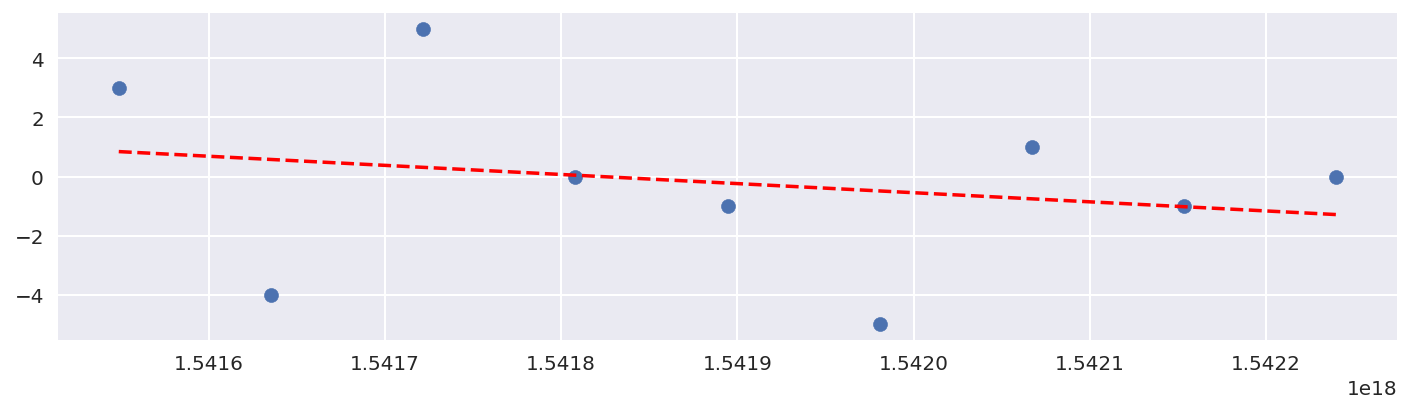

In [65]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['ShiftUp0Diff'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['ShiftUp1Diff'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [86]:
#df.groupby('day_of_week').Digit0.mean()
#vcdw=df['2018'].groupby(['day_of_week'])['Digit0'].value_counts(normalize=True)*100
vcdw=df.groupby(['day_of_week'])['Digit0'].value_counts(normalize=True)*100
vcdw[vcdw>vcdw.mean()]

day_of_week  Digit0
Fri          5         13.333333
             1         12.666667
             8         12.000000
             0         10.666667
             7         10.666667
Mon          4         14.000000
             6         12.000000
             5         10.666667
             8         10.666667
Sat          5         14.000000
             6         12.666667
             4         11.333333
             0         10.666667
Sun          4         14.000000
             3         12.666667
             5         11.333333
             6         10.666667
             7         10.666667
Thurs        2         14.000000
             5         13.333333
             1         12.000000
             4         10.666667
Tues         8         14.666667
             5         13.333333
             9         12.666667
             3         10.666667
Weds         0         12.000000
             2         12.000000
             5         11.333333
             9         

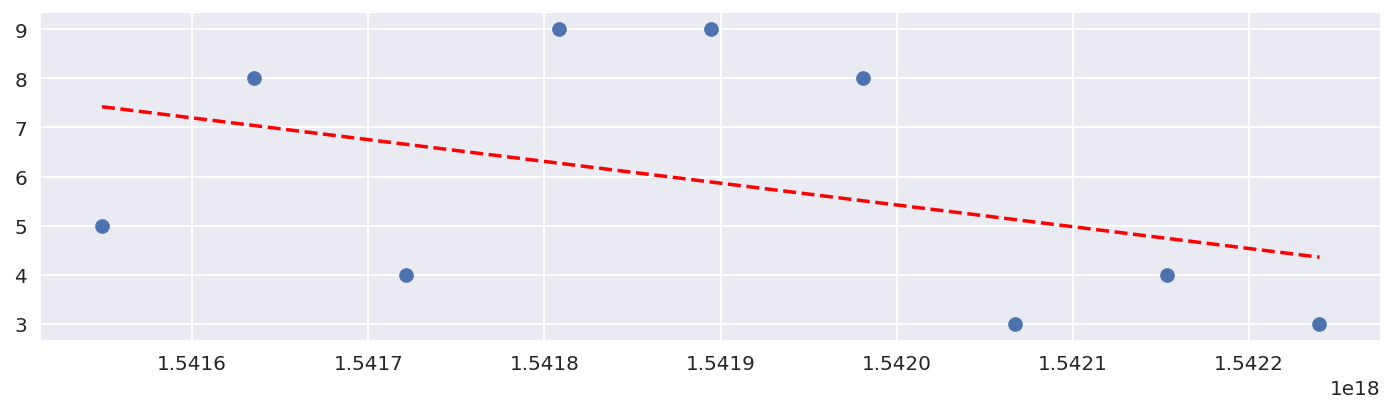

In [66]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['Digit0'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['Digit1'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [36]:
df.columns

Index(['WinNum', 'day_of_week', 'Digit0', 'Digit1', 'Digit2', 'First2',
       'FirstLast', 'Last2', 'ShiftUp0', 'Combo', 'ShiftUp1', 'ShiftUp2',
       'ShiftUp0Diff', 'ShiftUp1Diff', 'ShiftUp2Diff', 'DayNxDay0',
       'DayNxDay1', 'DayNxDay2', 'EvenOdd0', 'EvenOdd1', 'EvenOdd2',
       'PermComb'],
      dtype='object')

df['2018-11'][['EvenOdd0', 'EvenOdd1', 'EvenOdd2']].stack().value_counts(normalize=True)*100

df['2018'][['Digit0', 'Digit1', 'Digit2']].stack().value_counts()

In [81]:
vcGrpByD1=df.groupby(['Digit1'])['DayNxDay1'].value_counts()
vcGrpByD1[vcGrpByD1>vcGrpByD1.mean()]

Digit1  DayNxDay1
0       00           13
        07           13
        02           12
        05           12
        01           11
1       18           15
        11           14
        17           13
        14           12
        16           12
        12           11
2       26           17
        21           16
        23           15
        24           15
        25           14
        20           12
        27           11
        29           11
3       30           16
        34           16
        36           14
        37           14
        32           11
4       42           19
        45           11
5       52           18
        50           13
        57           12
6       63           16
        61           13
        62           13
        66           13
        69           13
        65           11
7       73           17
        72           15
        77           15
        70           12
        78           12
8       89           1

In [67]:
vcdw1=df.groupby(['day_of_week'])['Digit1'].value_counts(normalize=True)*100
vcdw1[vcdw1>vcdw1.mean()]

day_of_week  Digit1
Fri          3         14.666667
             4         12.666667
             7         12.666667
             2         12.000000
             0         10.666667
             6         10.000000
Mon          7         13.333333
             2         12.666667
             3         12.000000
             5         10.666667
             8         10.666667
Sat          3         13.333333
             1         11.333333
             2         11.333333
             5         11.333333
             4         10.666667
             6         10.000000
Sun          6         15.333333
             9         12.000000
             0         11.333333
             1         10.666667
             7         10.666667
Thurs        7         13.333333
             8         12.000000
             9         11.333333
             1         10.666667
             2         10.666667
             5         10.666667
Tues         1         12.666667
             2         

In [74]:
df.columns

Index(['WinNum', 'day_of_week', 'Digit0', 'Digit1', 'Digit2', 'First2',
       'FirstLast', 'Last2', 'ShiftUp0', 'Combo', 'ShiftUp1', 'ShiftUp2',
       'ShiftUp0Diff', 'ShiftUp1Diff', 'ShiftUp2Diff', 'DayNxDay0',
       'DayNxDay1', 'DayNxDay2', 'EvenOdd0', 'EvenOdd1', 'EvenOdd2',
       'PermComb'],
      dtype='object')

In [84]:
vcGrpByD2=df.groupby(['Digit2',''])['DayNxDay2'].value_counts()
vcGrpByD2Mn=vcGrpByD2.mean()
vcGrpByD2[vcGrpByD2>vcGrpByD2Mn]

Digit2  DayNxDay2
0       08           17
        03           12
        02           11
1       18           15
        19           13
        16           12
        11           11
        14           11
2       26           14
        29           14
        20           13
        22           13
        21           11
        23           11
3       37           13
        32           12
        36           12
        39           11
4       47           17
        41           15
        42           12
        40           11
        44           11
        45           11
5       54           19
        56           16
        59           14
        58           12
6       66           19
        60           18
        65           14
        62           13
        64           13
        67           13
        61           12
        63           11
7       76           14
        79           14
        70           12
        71           12
        73           1

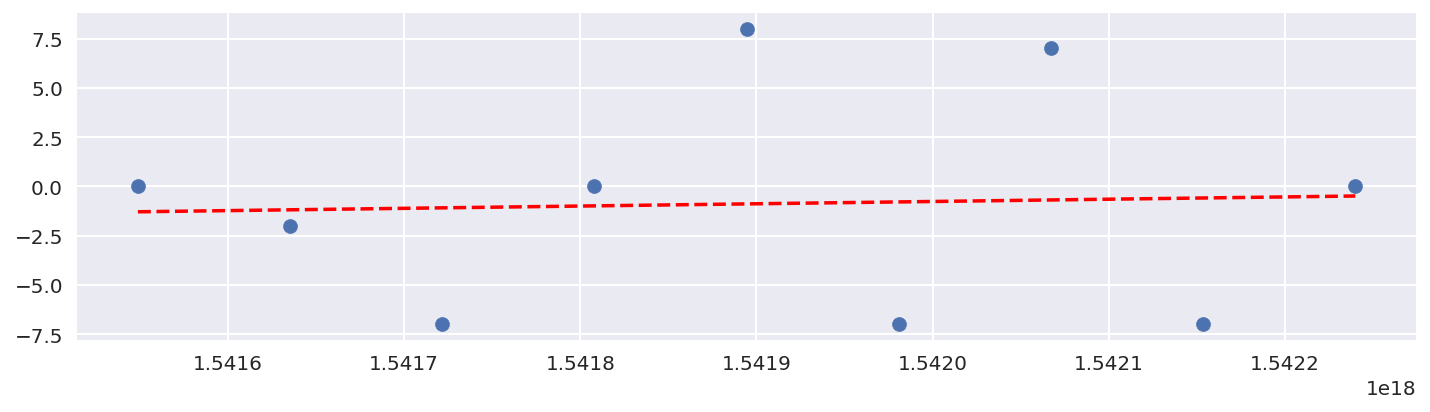

In [69]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['ShiftUp0Diff'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['ShiftUp2Diff'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

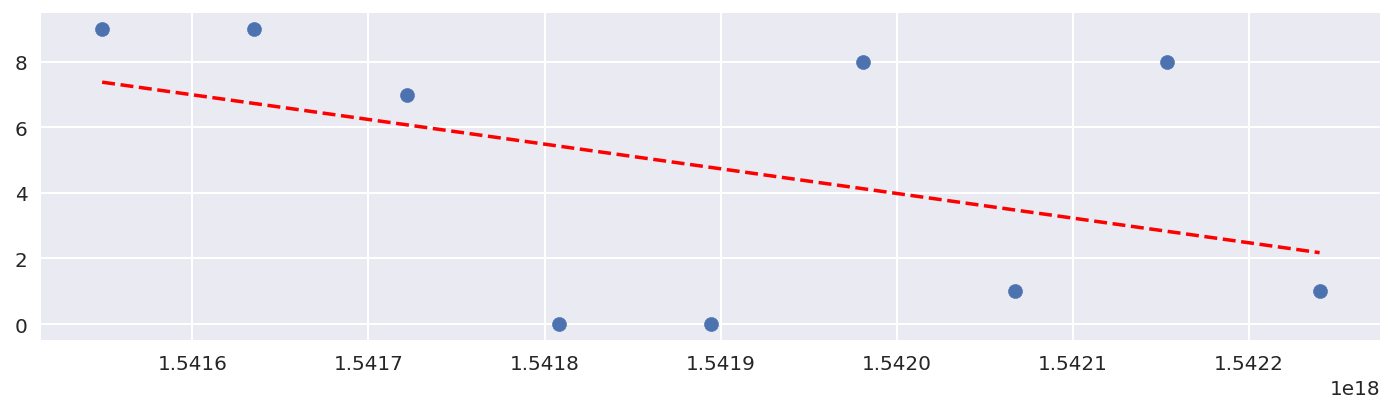

In [70]:
#df18[-10:]['ShiftUp0Diff'].plot()
#x = df['2018-11'].index.astype(int)
#y = df['2018-11']['Digit0'].astype(int)
x = df['2018-11-07':'2018-11-15'].index.astype(int)
y = df['2018-11-07':'2018-11-15']['Digit2'].astype(int)
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [68]:
vcdw2=df.groupby(['day_of_week'])['Digit2'].value_counts(normalize=True)*100
vcdw2[vcdw2>vcdw2.mean()]

day_of_week  Digit2
Fri          4         13.333333
             2         12.666667
             6         12.000000
             9         11.333333
             7         10.666667
Mon          7         13.333333
             8         12.666667
             9         12.000000
             6         10.666667
             1         10.000000
             4         10.000000
Sat          6         15.333333
             0         12.666667
             5         12.666667
             4         11.333333
             7         11.333333
Sun          6         12.000000
             0         11.333333
             1         11.333333
             2         11.333333
             8         11.333333
             4         10.666667
             5         10.000000
Thurs        1         13.333333
             7         12.666667
             4         11.333333
             5         11.333333
             9         10.666667
Tues         1         15.333333
             7         

In [93]:
#Numbers to Play based on Analysis


import itertools
results=[]
a = [ '9','8','7']
b = ['4' ,'6','7']
c = ['4','7','6','9','8','2']
for r in itertools.product(a, b, c):
    results.append(r[0] + r[1]+ r[2])
    
print("Count of Numbers ", len(results))
results = list(map(int, results))
#print(results)
print(list(itertools.permutations(['4','7','6','9','8','2'], 3)))

#digit0[2,3,4,5]  digit1 [0,6,2,7]

Count of Numbers  54
[('4', '7', '6'), ('4', '7', '9'), ('4', '7', '8'), ('4', '7', '2'), ('4', '6', '7'), ('4', '6', '9'), ('4', '6', '8'), ('4', '6', '2'), ('4', '9', '7'), ('4', '9', '6'), ('4', '9', '8'), ('4', '9', '2'), ('4', '8', '7'), ('4', '8', '6'), ('4', '8', '9'), ('4', '8', '2'), ('4', '2', '7'), ('4', '2', '6'), ('4', '2', '9'), ('4', '2', '8'), ('7', '4', '6'), ('7', '4', '9'), ('7', '4', '8'), ('7', '4', '2'), ('7', '6', '4'), ('7', '6', '9'), ('7', '6', '8'), ('7', '6', '2'), ('7', '9', '4'), ('7', '9', '6'), ('7', '9', '8'), ('7', '9', '2'), ('7', '8', '4'), ('7', '8', '6'), ('7', '8', '9'), ('7', '8', '2'), ('7', '2', '4'), ('7', '2', '6'), ('7', '2', '9'), ('7', '2', '8'), ('6', '4', '7'), ('6', '4', '9'), ('6', '4', '8'), ('6', '4', '2'), ('6', '7', '4'), ('6', '7', '9'), ('6', '7', '8'), ('6', '7', '2'), ('6', '9', '4'), ('6', '9', '7'), ('6', '9', '8'), ('6', '9', '2'), ('6', '8', '4'), ('6', '8', '7'), ('6', '8', '9'), ('6', '8', '2'), ('6', '2', '4'), ('6', '2'

# Numbers To Play

In [92]:
#Numbers to Play based on Analysis

import itertools
results=[]
a = [ '9','8','7']
b = ['4' ,'6','7']
c = ['4','7','6','9','8','2']
for r in itertools.product(a, b, c):
    results.append(r[0] + r[1]+ r[2])
    
print("Count of Numbers ", len(results))
results = list(map(int, results))
print(results)

#digit0[2,3,4,5]  digit1 [0,6,2,7]

Count of Numbers  54
[944, 947, 946, 949, 948, 942, 964, 967, 966, 969, 968, 962, 974, 977, 976, 979, 978, 972, 844, 847, 846, 849, 848, 842, 864, 867, 866, 869, 868, 862, 874, 877, 876, 879, 878, 872, 744, 747, 746, 749, 748, 742, 764, 767, 766, 769, 768, 762, 774, 777, 776, 779, 778, 772]


In [94]:
#Picked 3 Numbers Not Picked from 2016-2018
vcWinNum=df.WinNum.astype(int).value_counts().sort_index()
NumNotPlayed=set(vcWinNum.index).symmetric_difference(np.arange(0, 1000))
print("Count of Numbers Played Twice from 2016-2018:" ,len(vcWinNum[vcWinNum<vcWinNum.mean()]))
#print(len(vcWinNum[vcWinNum==2]))
print("Count of Numbers Not Played from 2016-2018:" ,len(NumNotPlayed))

NumNotPlayed = list(map(int, NumNotPlayed))
print(NumNotPlayed)


Count of Numbers Played Twice from 2016-2018: 364
Count of Numbers Not Played from 2016-2018: 350
[2, 3, 8, 14, 15, 18, 23, 27, 32, 42, 43, 45, 49, 51, 52, 53, 55, 60, 62, 67, 75, 79, 81, 83, 84, 86, 91, 93, 97, 99, 101, 105, 109, 111, 116, 117, 120, 121, 122, 123, 124, 126, 130, 131, 134, 137, 138, 141, 142, 143, 146, 150, 155, 156, 158, 160, 163, 167, 168, 171, 174, 175, 182, 185, 186, 192, 198, 199, 205, 208, 213, 214, 216, 218, 222, 224, 225, 233, 239, 240, 241, 243, 245, 248, 251, 255, 256, 260, 263, 265, 266, 267, 270, 271, 277, 282, 283, 284, 285, 290, 297, 300, 302, 304, 310, 314, 315, 317, 320, 323, 327, 330, 331, 333, 337, 341, 345, 349, 355, 356, 360, 363, 364, 366, 371, 372, 373, 374, 379, 382, 383, 384, 387, 388, 389, 393, 395, 397, 398, 400, 402, 406, 421, 427, 428, 431, 433, 434, 437, 439, 440, 441, 442, 449, 451, 453, 458, 460, 463, 465, 466, 467, 471, 472, 476, 477, 479, 484, 485, 486, 488, 489, 491, 497, 498, 501, 502, 504, 509, 517, 518, 519, 528, 532, 539, 542, 551,

In [95]:
#Generated List vs Numbers Not Played to filter numbers to play All data 2016 -2018
print("Count of numbers to play:",len(set(NumNotPlayed).intersection(results)))
print(set(NumNotPlayed).intersection(results))

Count of numbers to play: 16
{864, 962, 868, 772, 742, 967, 968, 744, 972, 844, 749, 976, 849, 848, 979, 767}


In [ ]:
#Generated List vs Numbers Not Played to filter numbers to play for data 2018
print("Count of numbers to play:",len(set(NumNotPlayed).intersection(results)))
print(set(NumNotPlayed).intersection(results))

In [100]:
#Able to search for a First2 data
print('Count of Digit pulled', len(df['2018'][df['2018']['First2'] == '53']))
df['2018'][df['2018']['First2'] == '53']

Count of Digit pulled 4


,WinNum,day_of_week,Digit0,Digit1,Digit2,First2,FirstLast,Last2,ShiftUp0,Combo,...,ShiftUp0Diff,ShiftUp1Diff,ShiftUp2Diff,DayNxDay0,DayNxDay1,DayNxDay2,EvenOdd0,EvenOdd1,EvenOdd2,PermComb
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01,535,Sat,5,3,5,53,55,35,6.0,355,...,1.0,3.0,-1.0,56,36,54,[],[],[],TwoDigitSame
2018-09-09,533,Sun,5,3,3,53,53,33,7.0,335,...,2.0,-1.0,4.0,57,32,37,[],[],[],TwoDigitSame
2018-11-13,531,Tues,5,3,1,53,51,31,6.0,135,...,1.0,1.0,7.0,56,34,18,[],[],[],NoDigitSame
2018-11-15,531,Thurs,5,3,1,53,51,31,0.0,135,...,0.0,0.0,0.0,50,30,10,[],[],[],NoDigitSame


In [102]:
#Able to search for a First2 data
print('Count of Digit pulled', len(df[df['WinNum'] == '976']))
df[df['WinNum'] == '976']

Count of Digit pulled 0


,WinNum,day_of_week,Digit0,Digit1,Digit2,First2,FirstLast,Last2,ShiftUp0,Combo,...,ShiftUp0Diff,ShiftUp1Diff,ShiftUp2Diff,DayNxDay0,DayNxDay1,DayNxDay2,EvenOdd0,EvenOdd1,EvenOdd2,PermComb
Date,,,,,,,,,,,,,,,,,,,,,


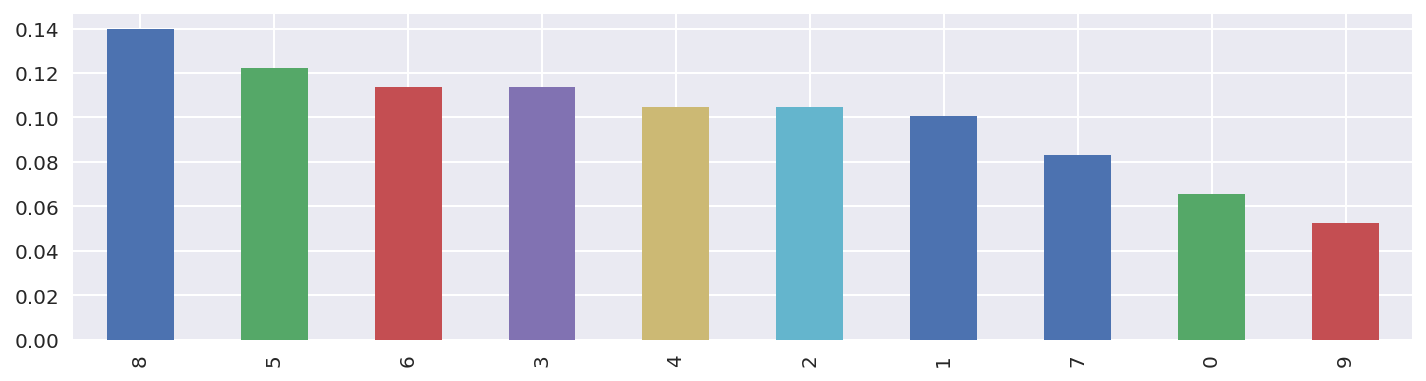

In [113]:
df['2018-04':'2018-11'].Digit0.value_counts(normalize=True).plot(kind='bar')